# Example application

Here we will go through the steps of a simple machine learning application based on the Iris data set. This involves:
* A simple analysis and viasualization of the data
* Building the model
* Making predictions
* Initial thoughts on how to measure the quality of the developed model/application

## Load the data and print a bit of information

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

The `iris_dataset` is a so-called `Bounce` object behaving similar to a dictionary with keys and values:

In [3]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


The value of `DESCR` is a description of the data:

In [4]:
print(iris_dataset['DESCR'][:1200] + "...\n")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

The target labels, i.e., the iris spicies (given as a list of strings):

In [5]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


... and the features (given as a list of strings):

In [6]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### The data itself

The data itself is contained under the keys `data`and `target`, both of which are numpy arrays

In [7]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


The rows of `data` corresponds to flowers while the columns correspond to the four features:

In [8]:
print("Number of flowers and number of features: {}".format(iris_dataset['data'].shape))

Number of flowers and number of features: (150, 4)


First ten measurements:

In [9]:
print(iris_dataset['data'][:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


We can also calculate some summary statistics for the features (forgetting that this information was already provided in the header file above):

In [11]:
import numpy as np

print("Mean values: {}".format(np.mean(iris_dataset['data'], axis=0)))
print("Standard deviations: {}".format(np.std(iris_dataset['data'], axis=0)))

Mean values: [5.84333333 3.05733333 3.758      1.19933333]
Standard deviations: [0.82530129 0.43441097 1.75940407 0.75969263]


The `target` (numpy) array contains the species of the individual flowers:

In [13]:
print("Shape of the target array: {}".format(iris_dataset['target'].shape))

Shape of the target array: (150,)


The spicies are encoded as 0, 1, and 2, and the flowers are sorted according their species category:

In [12]:
print("Target array: {}".format(iris_dataset['target']))

Target array: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Visualization

For creating the scatter plots we first concvert the data into a pandas dataframe, and then use pandas for the plotting

In [14]:
import pandas as pd

# Create dataframe
iris_df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
iris_df[0:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


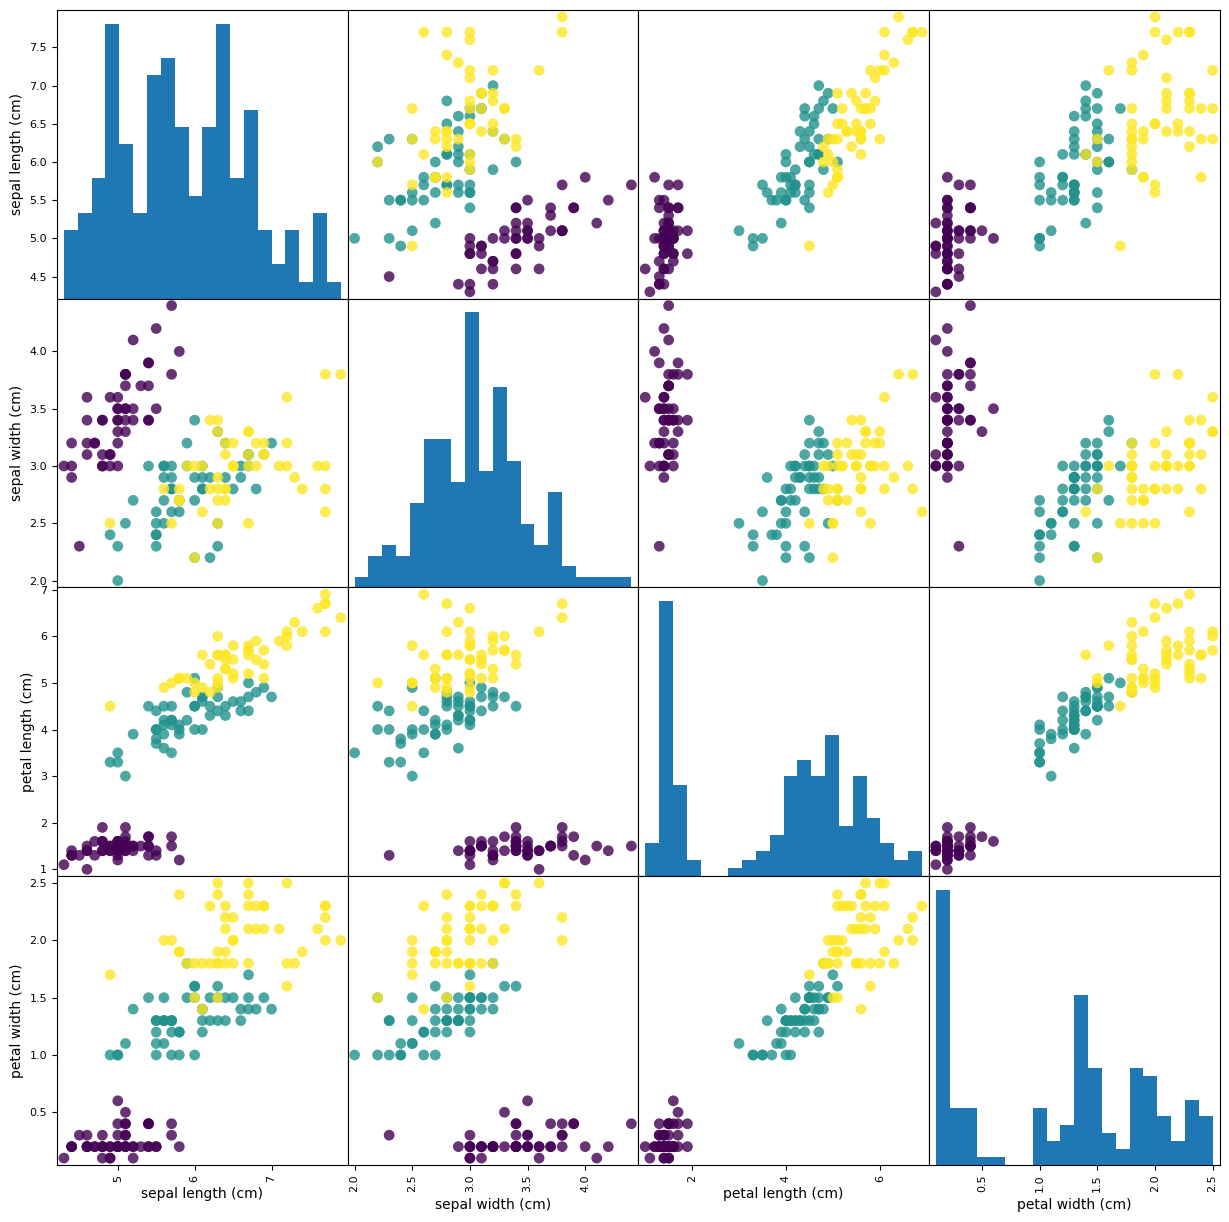

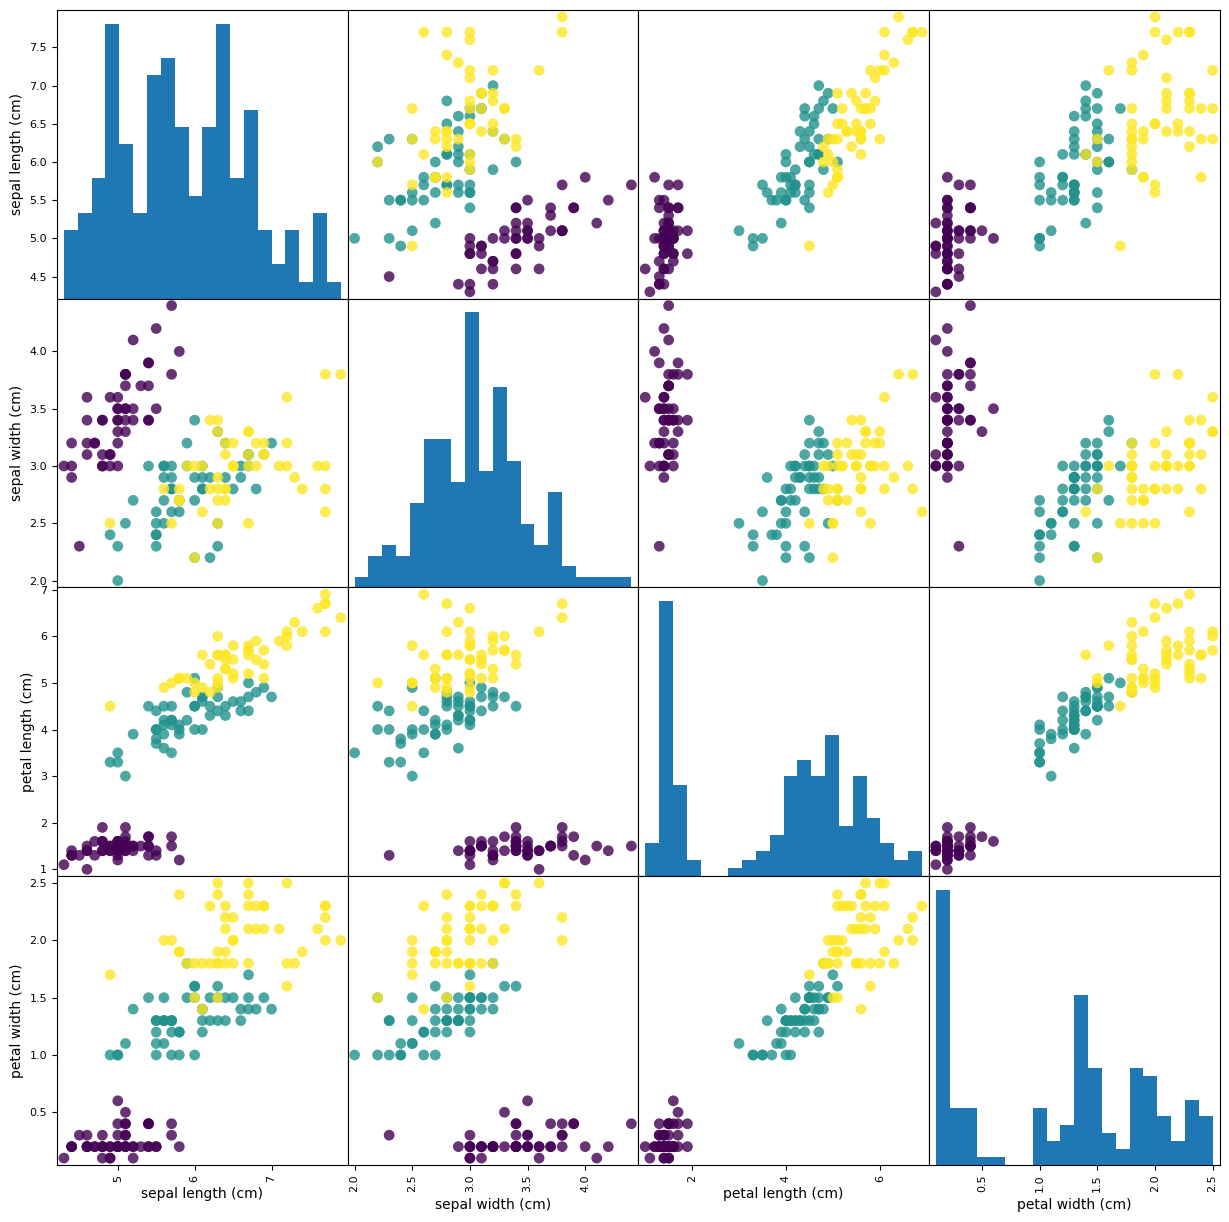

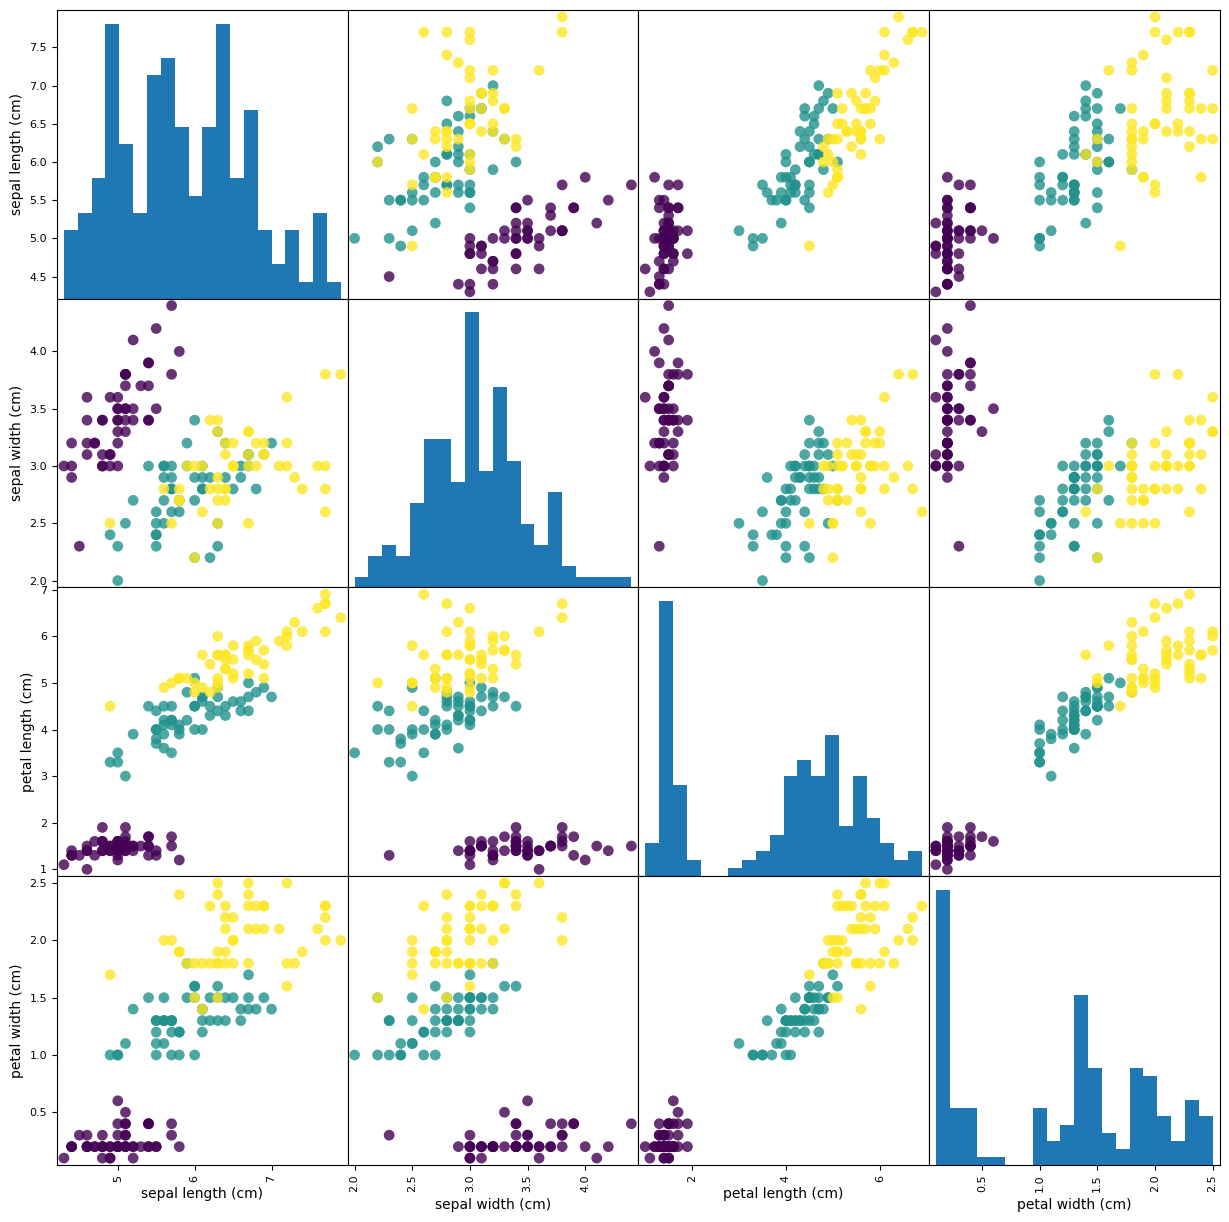

In [17]:
# Create scatter plot and color by class label.
%matplotlib inline
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(iris_df, c=iris_dataset['target'], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

## Building a model

For illustrating the process we use the naïve Bayes model (more on this later). This model 
* defines a probability distribution over the features and the target variables
* makes certain assumptions about how the features and the class/target interact
* assumes that conditional on the class, the features follow a Gaussian distribution 

$$ f(x_i|y) = \frac{1}{\sqrt{2\cdot \pi\cdot \sigma_y^2}}\exp \bigg (\frac{-(x_i-\mu_y)^2}{2\cdot \sigma_y^2}\bigg )$$

<img src="normal.png">

In scikit-learn all ML algorithms are implemented in their own class (for naïve Bayes it is `GaussianNB` under `sklearn.naive_bayes`) that should be instantiated.

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

Use the `fit` method for learning the model; this function takes as arguments the training data and the corresponding labels 

In [20]:
gnb.fit(iris_dataset['data'], iris_dataset['target'])

GaussianNB()

## Making predictions

We use the learned model to make predictions about new data instances for which we do no kow the labels

In [21]:
# New data organized in a two-dimensional array 
x_new = np.array([[5, 2.9, 1, 0.2]])

In [22]:
gnb.predict_proba(x_new)

array([[1.00000000e+00, 4.32800911e-18, 4.72762566e-26]])

In [23]:
predict = gnb.predict(x_new)

In [24]:
print("Prediction: {}".format(predict))
print("Target name: {}".format(iris_dataset['target_names'][predict]))

Prediction: [0]
Target name: ['setosa']


## Model criticism

One would typically make predictions on a collection of (known) instances. The performance of the algorithm on these instance would (usually) trigger a feedback loop, where you would
* go back and reanalyze/process your data
* revise your model